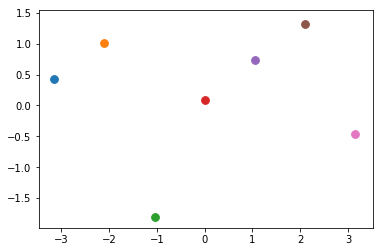

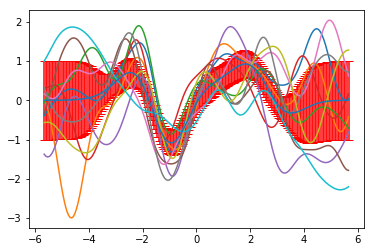

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import math
from numpy.linalg import inv
from scipy.stats import multivariate_normal

pi = math.pi
def SE_covariance(x1, x2, l):
    K = np.exp(-cdist(x1,x2)**2/(l**2))
    return K

train_n = 7
test_n = 200
error_mean = 0
error_variance = 0.5
x_train = np.linspace(-math.pi, math.pi, train_n).reshape(-1,1)
#generate test data that is both within and outside the range of the training data
x_test = np.linspace(- 1.8 * math.pi, 1.8*math.pi, test_n).reshape(-1,1)

noise = np.random.normal(error_mean, math.sqrt(error_variance), train_n)
#print(noise)

def generate_y_values(n): # creates y values for training data, using the provided model
    y_values = []
    for i in range(0, n):
        y = math.sin(x_train[i]) + noise[i] #the model
        y_values.append(y)
        plt.scatter(x_train[i], y, s=60)
    plt.show()
    Y = np.array(y_values)
    return Y
    
Y = generate_y_values(train_n)

ls = 1
post_noise = error_variance*np.identity(len(x_train))
K_xs_x = SE_covariance(x_test, x_train, ls)
K_x_x = SE_covariance(x_train, x_train, ls)
K_xs_xs = SE_covariance(x_test, x_test, ls)
K_x_xs = SE_covariance(x_train, x_test, ls)
def pred_pos_cov():
    return K_xs_xs - np.matmul(np.matmul(K_xs_x, inv(K_x_x + post_noise)), K_x_xs)
def pred_pos_mean():
    return np.matmul(np.matmul(K_xs_x, inv(K_x_x + post_noise)), Y)
def predictive_posterior():
    return multivariate_normal(pred_pos_mean(), pred_pos_cov(), allow_singular=True)

posterior = predictive_posterior()

samples = np.random.multivariate_normal(pred_pos_mean(), pred_pos_cov(), 10)
plt.errorbar(x_test, pred_pos_mean(), yerr=np.diagonal(pred_pos_cov()), capsize=4, ecolor='r')#marker='s', mfc='red',mec='green', ms=20, mew=4)
plt.plot(x_test, samples.T)
plt.show()